In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import itertools
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

data = "diabetes_csv.csv"

df = pd.read_csv(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


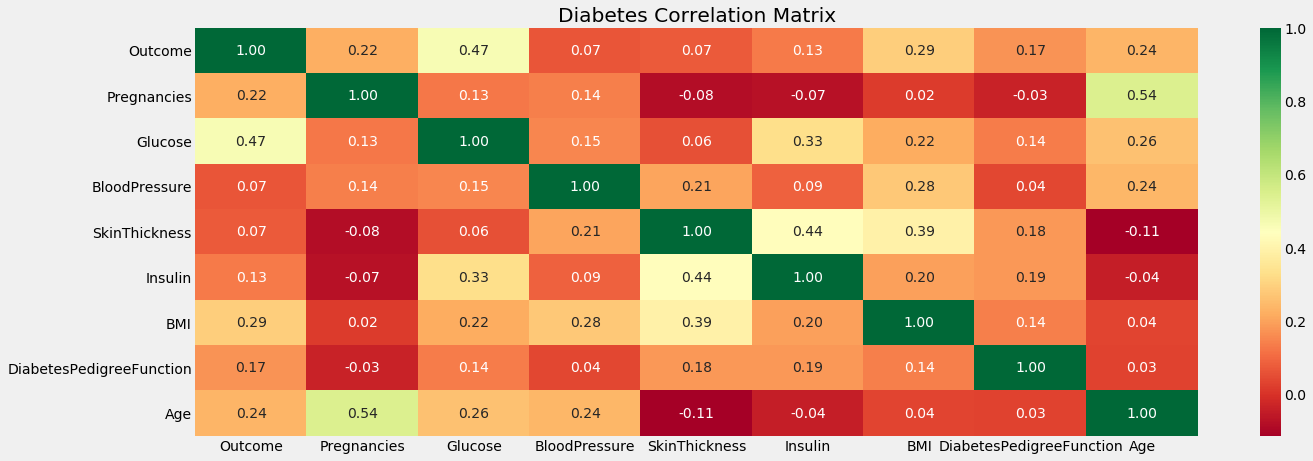

In [57]:
#compute the correlation matrix among the variables and plotted as heat map.

matrix = df[['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
cor = matrix.corr() 

sns.heatmap(cor, annot = True, fmt= '.2f', cmap='RdYlGn')
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.title('Diabetes Correlation Matrix')
#sns.heatmap(cor, square = True)

plt.savefig('Heatmap2.png')

plt.show()

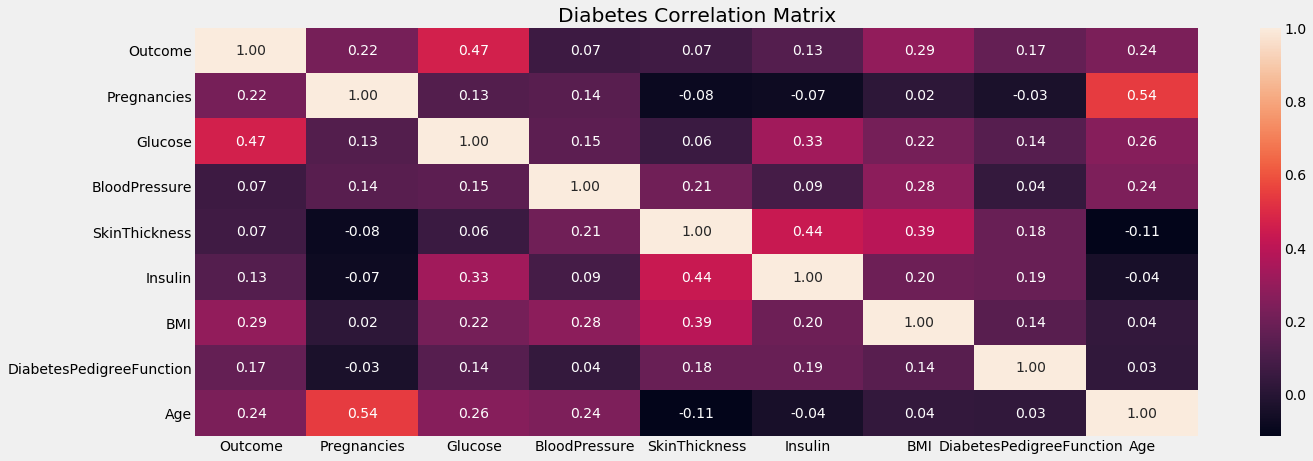

In [58]:
matrix = df[['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
cor = matrix.corr() 

sns.heatmap(cor, annot = True, fmt= '.2f')
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.title('Diabetes Correlation Matrix')
#sns.heatmap(cor, square = True)

plt.savefig('heatmap3.png')

plt.show()

0.031408867142381905
0.2281896032923779
0.2218981530339865
5.065127298053806e-10
0.004986776768096088


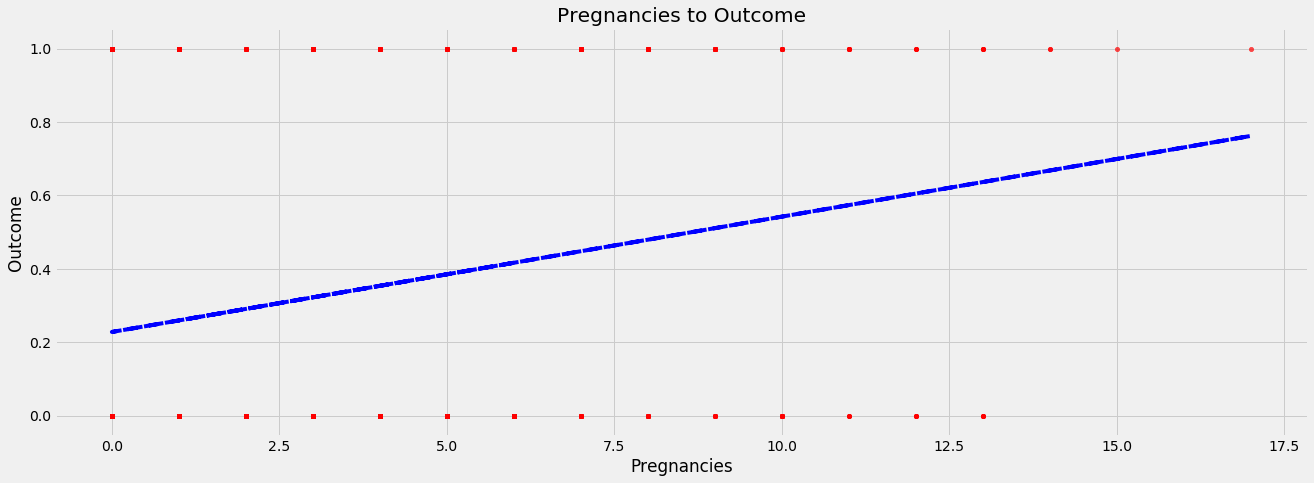

In [59]:
#scatter plots
xdata = df["Pregnancies"]
# (slope,intercept,_,_,_) = stats.linregress("average_GDP_all","average_happiness_score_all")
ydata = df["Outcome"] 

(slope,intercept,r,p,std) = stats.linregress(xdata,ydata)
fiteco = slope * xdata + intercept

df.plot(kind='scatter', x='Pregnancies', y="Outcome",alpha = 0.7,color = 'red')
plt.xlabel('Pregnancies')              
plt.ylabel('Outcome')
plt.title('Pregnancies to Outcome')
plt.plot(xdata, fiteco, "b--")
plt.savefig('Pregnancies to Outcome.png')
print(slope)
print(intercept)
print(r)
print(p)
print(std)
plt.show()

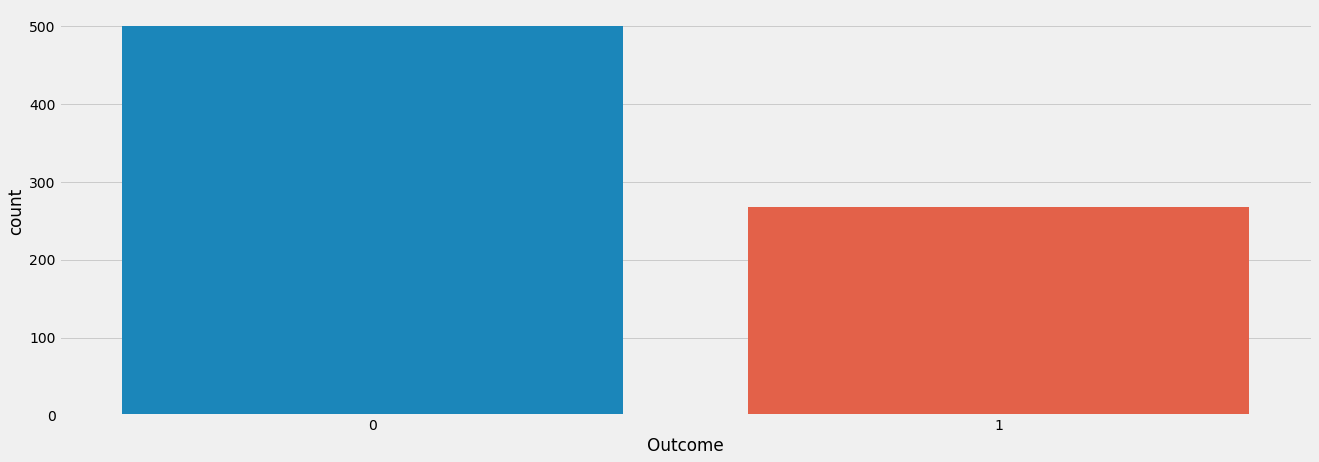

In [60]:
sns.countplot(x='Outcome',data=df)
plt.show()

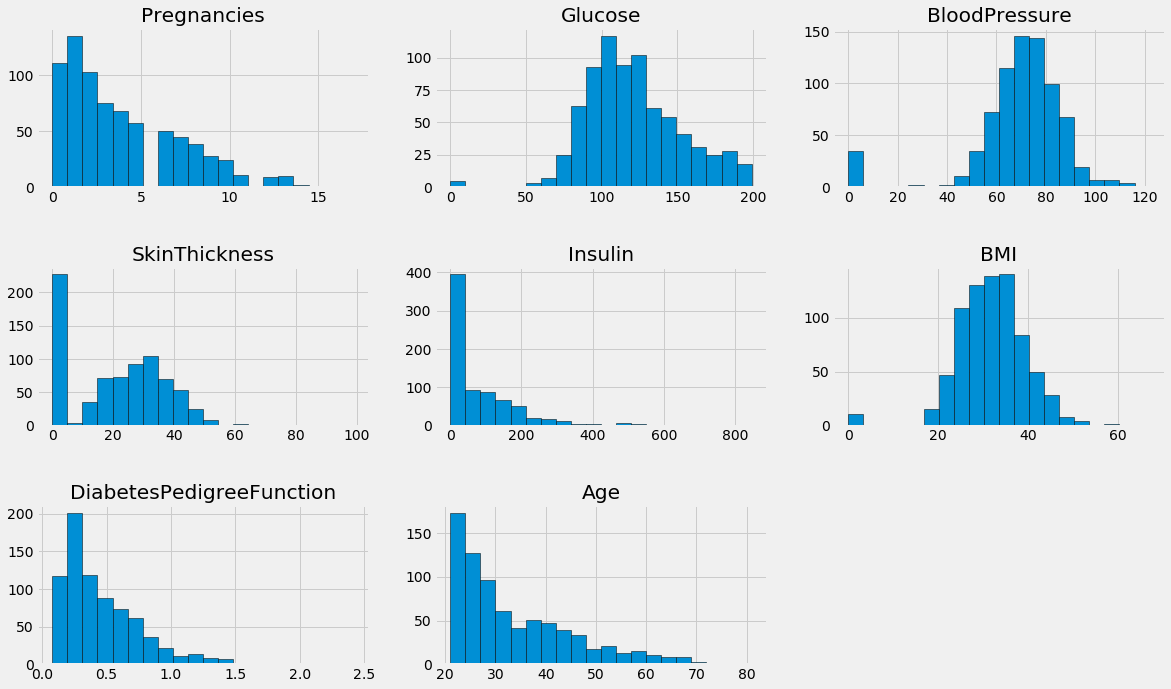

In [39]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

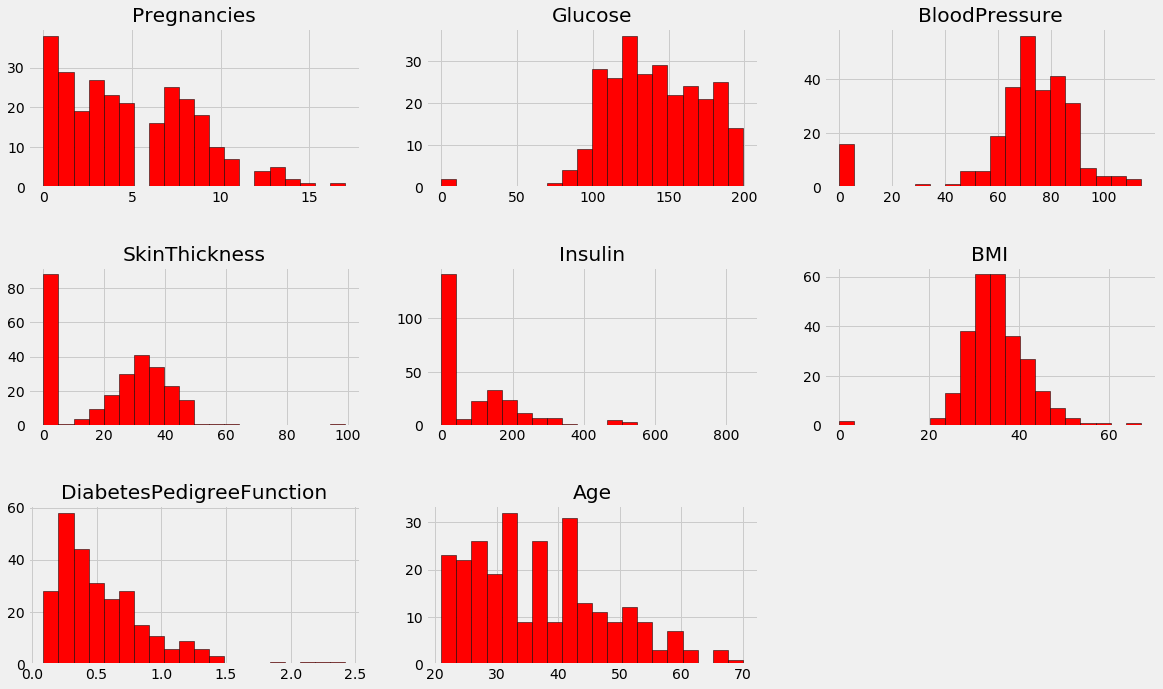

In [51]:
df1=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df1[i].hist(bins=20,edgecolor='black',color='red')
    plt.title(i)
plt.show()

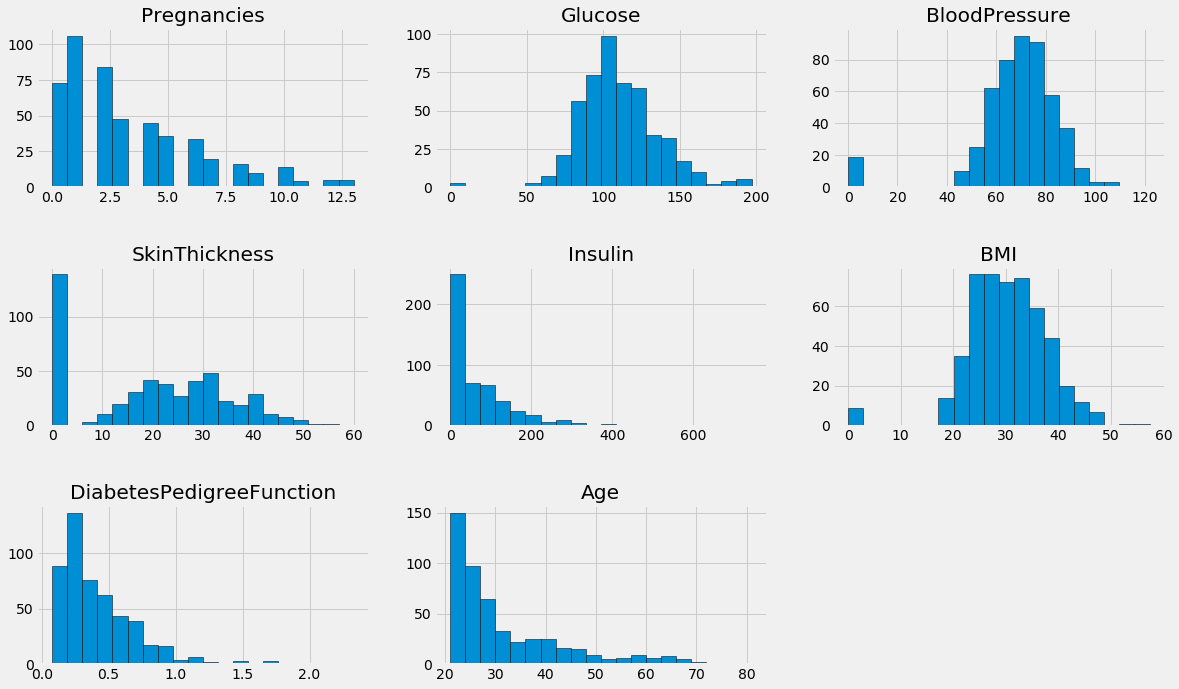

In [49]:
df2=df[df['Outcome']==0]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df2[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

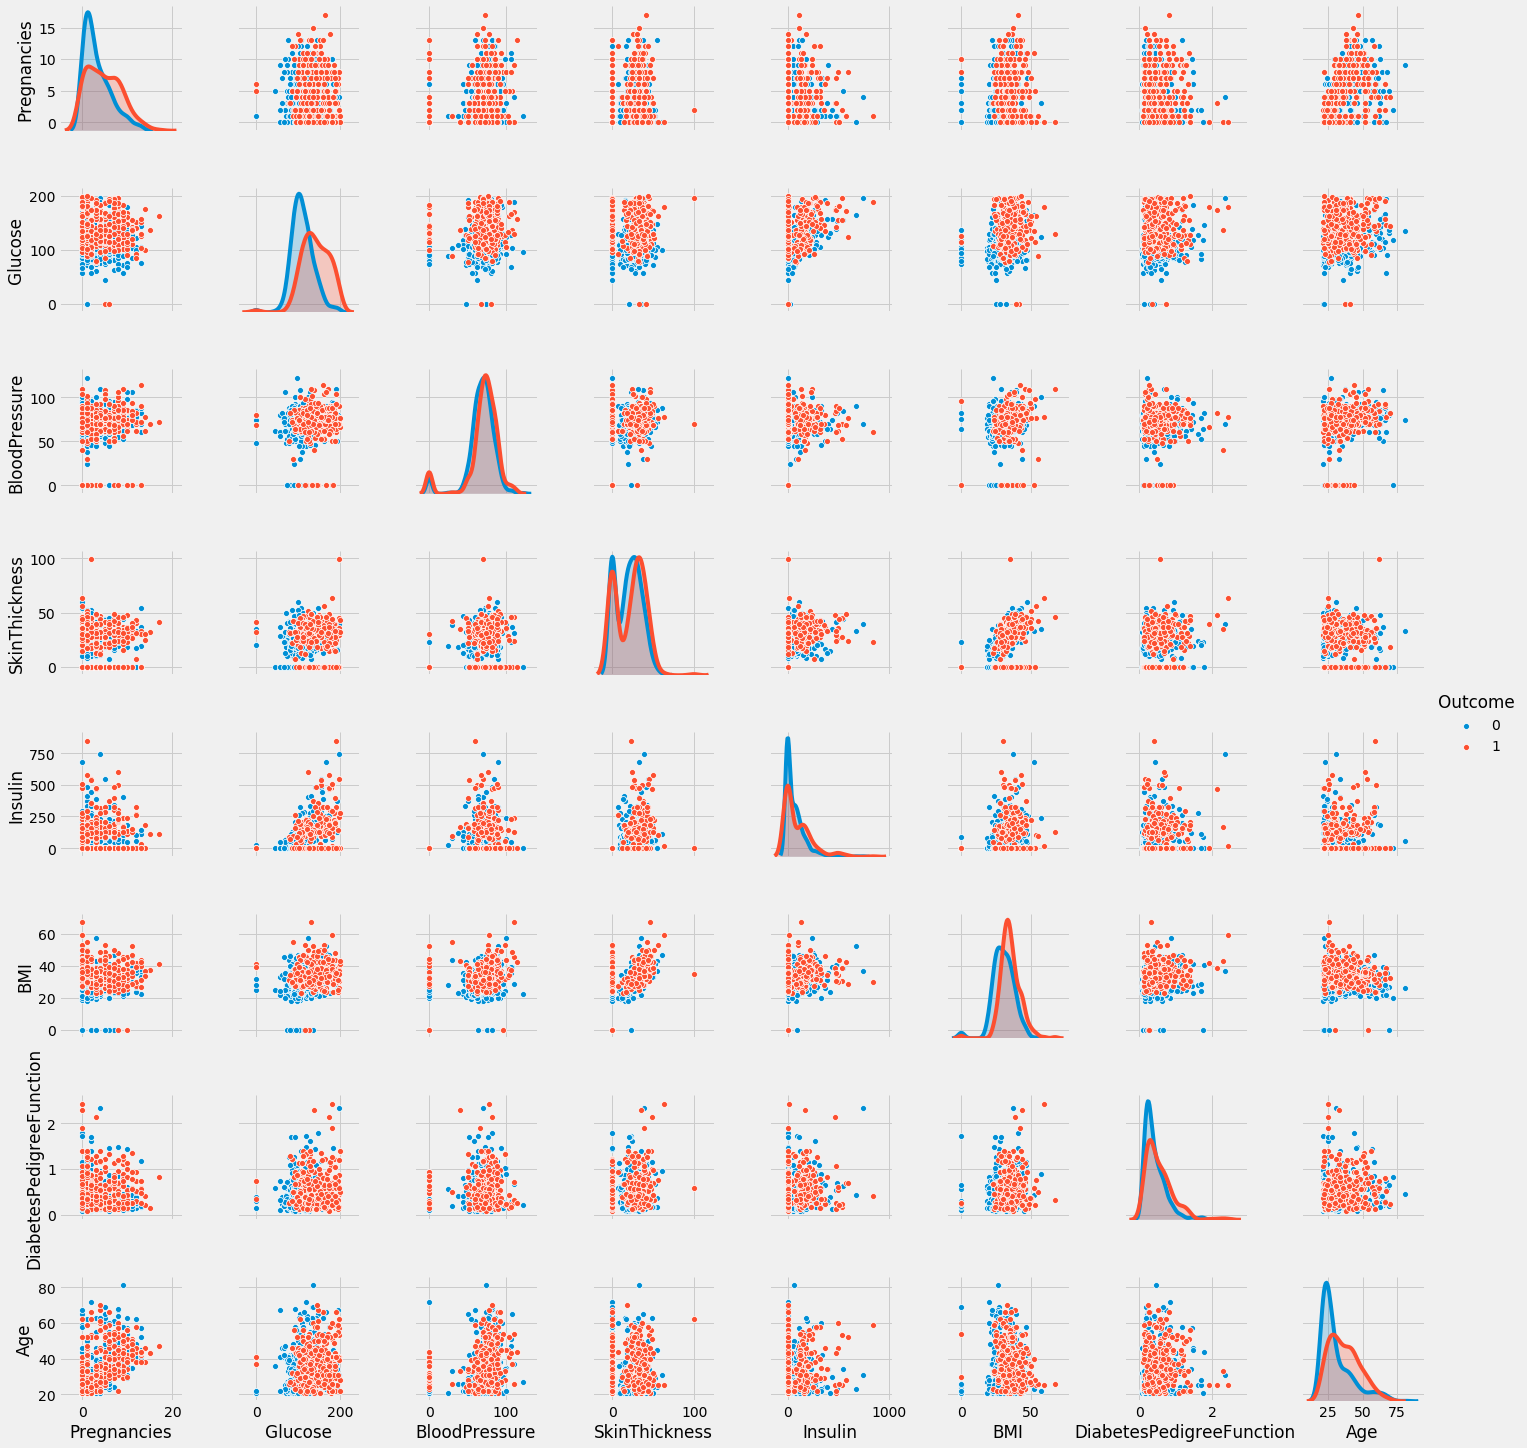

In [68]:
sns.pairplot(df,hue='Outcome',diag_kind='kde')
plt.show()